# Projeto de Regressão Linear - Decisão de Desenvolvimento 

Esta é uma analise para uma empresa de comércio eletrônico com sede na cidade de Nova York que vende roupas online, mas também tem sessões de consultoria em estilo e vestuário na loja. Os clientes entram na loja, têm sessões / reuniões com um estilista pessoal, então podem ir para casa e encomendarem em um aplicativo móvel ou site para a roupa que desejam.

O objetivo da analise é saber se seria melhor para a empresa concentrar seus esforços em sua experiência em aplicativos móveis ou em seu site.

## Imports


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Obter dados

Trabalharemos com o arquivo csv do Ecommerce Customers da empresa.

* Avg. Session Length: Tempo médio das sessões de consultoria de estilo na loja.
* Time on App: Tempo gasto no app em minutos.
* Time on Website: Tempo gasto no site em minutos.
* Lenght of Membership: Há quantos anos o cliente é membro.
* Yearly Amount Spent: A quantidade gasta anual do cliente


In [3]:
clientes = pd.read_csv("Ecommerce Customers")

# Resumo dos Dados

In [4]:
clientes.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
clientes.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Análise de dados exploratória

Aqui temos um jointplot para termos uma noção gráfrica de como os dados estão distribuidos.

A distribuição feita foi:  
   - Um jointplot do tempo no site pelo valor gasto no ano.
   - Um jointplot do tempo no aplicativo pelo valor gasto no ano.
   
Por essa simples observação podemos ter uma idéia que o aplicativo já vale mais a pena do que o site, mas não podemos tomar essa decisão tão cegamente.


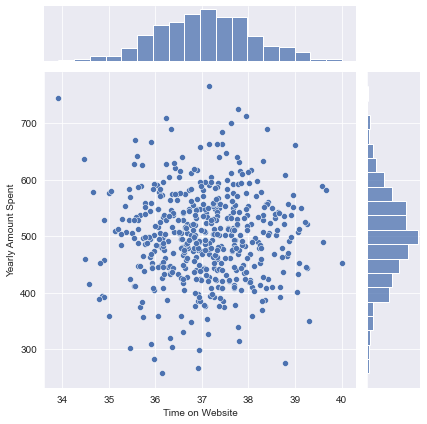

In [7]:
sns.set_style("darkgrid")
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=clientes, color="#4c72b0")

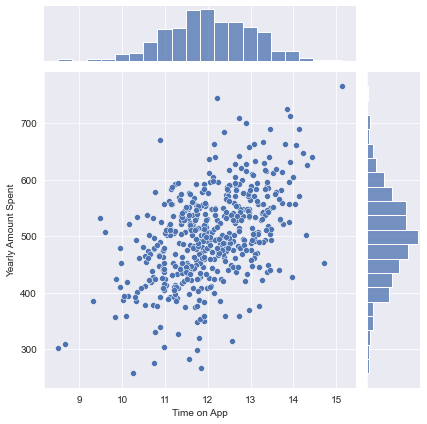

In [8]:
sns.set_style("darkgrid")
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=clientes, color='#4c72b0')



Abaixo temos um jointplot em formato de mapa de calor hex, do tempo no aplicativo pelo tempo que o cliente é membro, podemos ver que não há uma relação tão gritante como o outro gráfico acima da quantidade gasta no ano pelo tempo no aplicativo



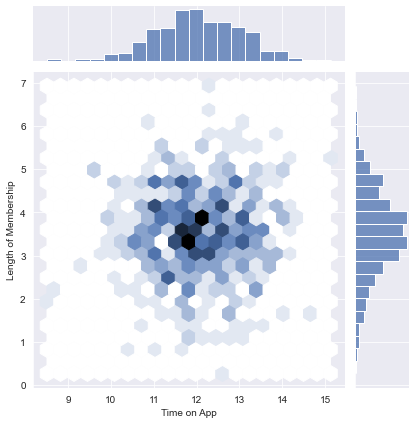

In [9]:
sns.set_style("darkgrid")
sns.jointplot(x='Time on App', y='Length of Membership', data=clientes, kind='hex', color="#4c72b0")

Aqui temos mais alguns plots para termos uma noção de como os dados se comportam entre si

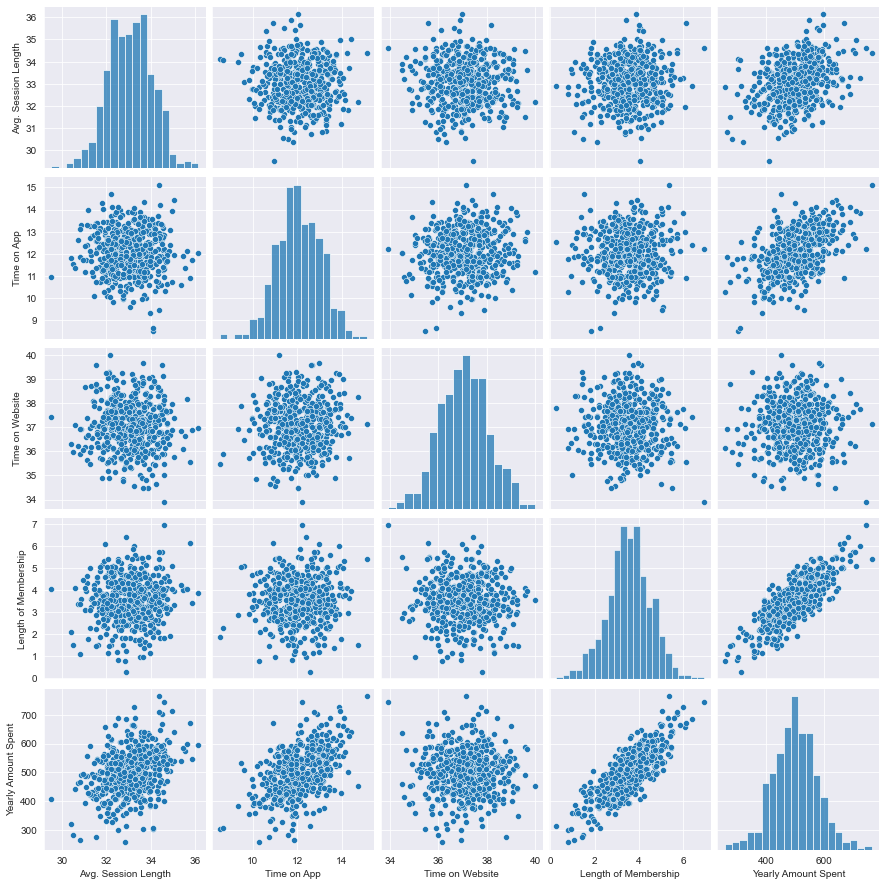

In [10]:
sns.pairplot(clientes)

Podemos perceber que o tempo que o cliente é membro tem uma boa relação com a quantidade gasta por ano.
Abaixo temos este gráfico maior para melhor visualização.

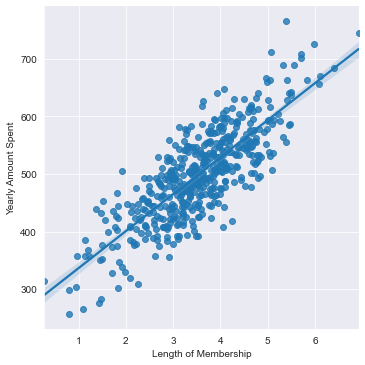

In [13]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=clientes)

## Treinando e testando os dados

Aqui iremos dividir os nossos dados em dois tipos de dados em duas variaveis, a variavel X que contem todos os valores numéricos menos a quantidade gasta por ano e a variavel Y que é a propria coluna da quantidade gasta no ano, que é o nosso alvo, ou seja, a variavel que a análise é voltada para, pois nosso objetivo é aumentar os lucros da empresa nesse caso.

In [14]:
Y = clientes['Yearly Amount Spent']

In [15]:
X = clientes[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

Aqui iremos fazer uma separação aleatória dos dados para termos uma parte de dados de teste e dados de treinamento. O teste está com 30% dos dados e o treinamento com o resto dos dados 

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.3)

## Treinando o modelo



In [18]:
from sklearn.linear_model import LinearRegression

A variavel lm será treinada para os dados de treinamento 

In [20]:
lm = LinearRegression()
lm.fit(X_treino, Y_treino)

LinearRegression()

Temos abaixo os coeficientes de regressão, eles são basicamente a medida que o valor gasto anual aumenta.
Exemplo:
    De acordo com a regressão linear feita a cada ano que passa 
    e o cliente é membro o valor gasto anual dela aumenta em $61.78

In [26]:
coefs = lm.coef_
tabela_coefs = pd.DataFrame([coefs], columns =['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership'])
tabela_coefs

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,25.698583,38.500077,0.605872,61.591275


## Previsão de dados de teste
Agora vamos verificar se o nosso modelo bate com os dados de teste, vamos avaliar o seu desempenho ao prever os valores de teste.

In [22]:
previsao = lm.predict(X_teste)

Aqui temos um scatterplot dos valores reais de teste em relação aos valores preditos.

A explicação por trás desse scatterplot é que quanto mais perto isso for de uma diagonal ascendente mais acertivo o modelo está, por que pelo plano cartesiano podemos confirmar isso.

Podemos pegar de exemplo o que estaria no valor previsto para 400 no eixo Y, e quando vamos verificar no eixo X com os valores de teste eles chegam perto ou batem no 400 também.

Text(0, 0.5, 'Previsão Y')

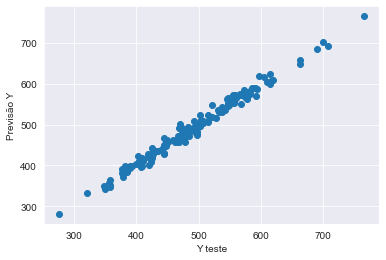

In [23]:
plt.scatter(Y_teste, previsao)
plt.xlabel('Y teste')
plt.ylabel('Previsão Y')

## Avaliando o Modelo

Vamos avaliar o desempenho do nosso modelo calculando a soma residual dos quadrados e o escore de variância explicado (R ^ 2).

** Calcule o erro absoluto médio, o erro quadrado médio e o erro quadrado médio da raiz. Consulte a palestra ou a Wikipédia para as fórmulas **

In [28]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_teste, previsao))
print('MSE:', metrics.mean_squared_error(Y_teste, previsao))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_teste, previsao)))

MAE: 8.326986068390191
MSE: 110.97172479079556
RMSE: 10.534311785342009


## Resíduos

Você deve ter obtido um modelo muito bom com um bom ajuste. Vamos explorar rapidamente os resíduos para garantir que tudo esteja bem com os nossos dados.

** Trace um histograma dos resíduos e certifique-se de que ele parece normalmente distribuído. Use o seaborn distplot, ou apenas o plt.hist (). **

C:\Users\Desktop\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

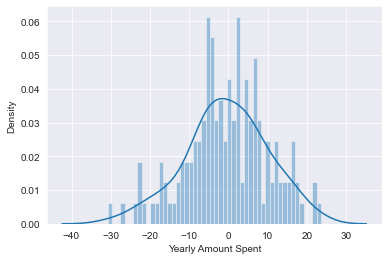

In [25]:
sns.distplot((Y_teste-previsao), bins=50)

## Conclusão
Com a tabela dos coeficentes que criamos podemos verificar e afirmar que os esforços devem ser gastos no aplicativo por que os clientes que ficam no aplicativo gastam mais do que os clientes que ficam no site, por que as pessoas que usam o aplicativo tem um gasto previsto de 38.50 dolares por minuto que estão no aplicativo, já as do site tem um gasto de 0.60 dolares por minuto e essas previsões podem ser consideradas confiáveis pela confirmação que obtivemos na parte "Previsão de dados de teste"

In [27]:
tabela_coefs

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,25.698583,38.500077,0.605872,61.591275
